# Importing needed libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl
import numpy as np

# Importing Data

In [2]:
#Importing data
pdf2020 = pd.read_excel('./../Data sets/Census 2020 - PL94 Redistricting Data.xlsx')

In [3]:
#Info about rows and columns
pdf2020.shape

#Changing the number of rows displayed
pd.set_option('display.max_rows', None)

#displaying first 5 rows
pdf2020.head()

,Unnamed: 0,Social Explorer - Census 2020 - PL94 Redistricting Data,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49
0,Statistics,"Census Tract 9, Hamilton County, Ohio",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,TOTAL (All Selected Census Tracts),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SE:T1. Total Population,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2010,NaN,2020.0,NaN,Change,NaN,% Change,NaN,NaN,...,NaN,2010,NaN,2020.0,NaN,Change,NaN,% Change,NaN,NaN
4,Total Population,1652,NaN,1660.0,NaN,8,NaN,0.005,NaN,NaN,...,NaN,6064,NaN,5622.0,NaN,-442,NaN,-0.073,NaN,NaN


# Cleaning data

In [4]:
#Removing rows with all NaN values 
pdf2020 = pdf2020.dropna(subset=["Unnamed: 0"])
pdf2020 = pdf2020.dropna(subset=["Social Explorer - Census 2020 - PL94 Redistricting Data"])

# Replacing NaN by 0s
pdf2020 = pdf2020.fillna(0)

#Dropping first row
pdf2020 = pdf2020.drop([0])

#Showing a list of columns names
list(pdf2020)

['Unnamed: 0',
 'Social Explorer - Census 2020 - PL94 Redistricting Data',
 'Unnamed: 2',
 'Unnamed: 3',
 'Unnamed: 4',
 'Unnamed: 5',
 'Unnamed: 6',
 'Unnamed: 7',
 'Unnamed: 8',
 'Unnamed: 9',
 'Unnamed: 10',
 'Unnamed: 11',
 'Unnamed: 12',
 'Unnamed: 13',
 'Unnamed: 14',
 'Unnamed: 15',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18',
 'Unnamed: 19',
 'Unnamed: 20',
 'Unnamed: 21',
 'Unnamed: 22',
 'Unnamed: 23',
 'Unnamed: 24',
 'Unnamed: 25',
 'Unnamed: 26',
 'Unnamed: 27',
 'Unnamed: 28',
 'Unnamed: 29',
 'Unnamed: 30',
 'Unnamed: 31',
 'Unnamed: 32',
 'Unnamed: 33',
 'Unnamed: 34',
 'Unnamed: 35',
 'Unnamed: 36',
 'Unnamed: 37',
 'Unnamed: 38',
 'Unnamed: 39',
 'Unnamed: 40',
 'Unnamed: 41',
 'Unnamed: 42',
 'Unnamed: 43',
 'Unnamed: 44',
 'Unnamed: 45',
 'Unnamed: 46',
 'Unnamed: 47',
 'Unnamed: 48',
 'Unnamed: 49']

In [5]:
#Columns to keep
columns_to_keep= ['Unnamed: 0',
                  'Unnamed: 3',
                  'Unnamed: 4',
                  'Unnamed: 13',
                  'Unnamed: 14',
                  'Unnamed: 23',
                  'Unnamed: 24',
                  'Unnamed: 33',
                  'Unnamed: 34',
                  'Unnamed: 43',
                  'Unnamed: 44']

pdf2020 = pdf2020[columns_to_keep]

#Renaming columns
pdf2020.columns = ['Category',
                   'Census Tract 9, Hamilton County, Ohio',
                   'Census Tract 9 Percentage',
                   'Census Tract 10, Hamilton County, Ohio',
                   'Census Tract 10 Percentage',
                   'Census Tract 16, Hamilton County, Ohio',
                   'Census Tract 16 Percentage',
                   'Census Tract 17, Hamilton County, Ohio',
                   'Census Tract 17 Percentage',
                   'TOTAL (All Selected Census Tracts)',
                   'All Census Tract Percentage']

#Removing columns I dont want
for col in pdf2020.columns:
    if 'Percentage' in col:
        del pdf2020[col]


In [6]:
#Obtaining index values of all the rows
pdf2020.index.values

#Removing all the rows I don't want
pdf2020 = pdf2020.drop([4, 15, 19, 20, 21, 25, 26, 27, 28, 29,
       30, 31, 32, 33, 34])

In [7]:
pdf2020

,Category,"Census Tract 9, Hamilton County, Ohio","Census Tract 10, Hamilton County, Ohio","Census Tract 16, Hamilton County, Ohio","Census Tract 17, Hamilton County, Ohio",TOTAL (All Selected Census Tracts)
8,Total Population,1660.0,1688.0,1059.0,1215.0,5622.0
9,White,847.0,1045.0,389.0,374.0,2655.0
10,African American or Black,676.0,456.0,586.0,720.0,2438.0
11,American Indian and Alaska Native,4.0,4.0,0.0,0.0,8.0
12,Asian,28.0,51.0,7.0,21.0,107.0
13,Native Hawaiian and Other Pacific Islander,0.0,0.0,1.0,0.0,1.0
14,Other,17.0,16.0,9.0,13.0,55.0


# Creating Visualizations

<AxesSubplot:xlabel='Category'>

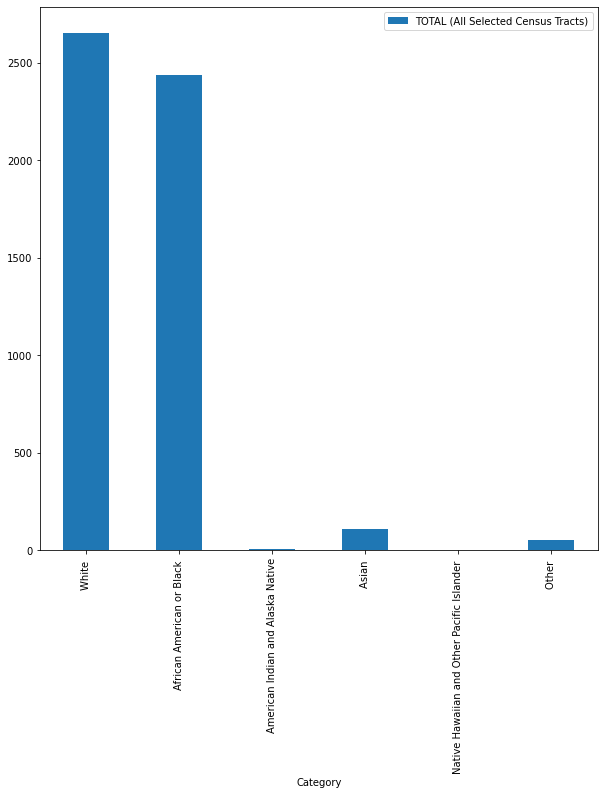

In [8]:
pdf2020.iloc[1:7].plot.bar(x = 'Category', y = 'TOTAL (All Selected Census Tracts)', figsize=(10,10))

In [9]:
pdf2020.to_pickle('pdf2020.pkl')